[*********************100%***********************]  1 of 1 completed


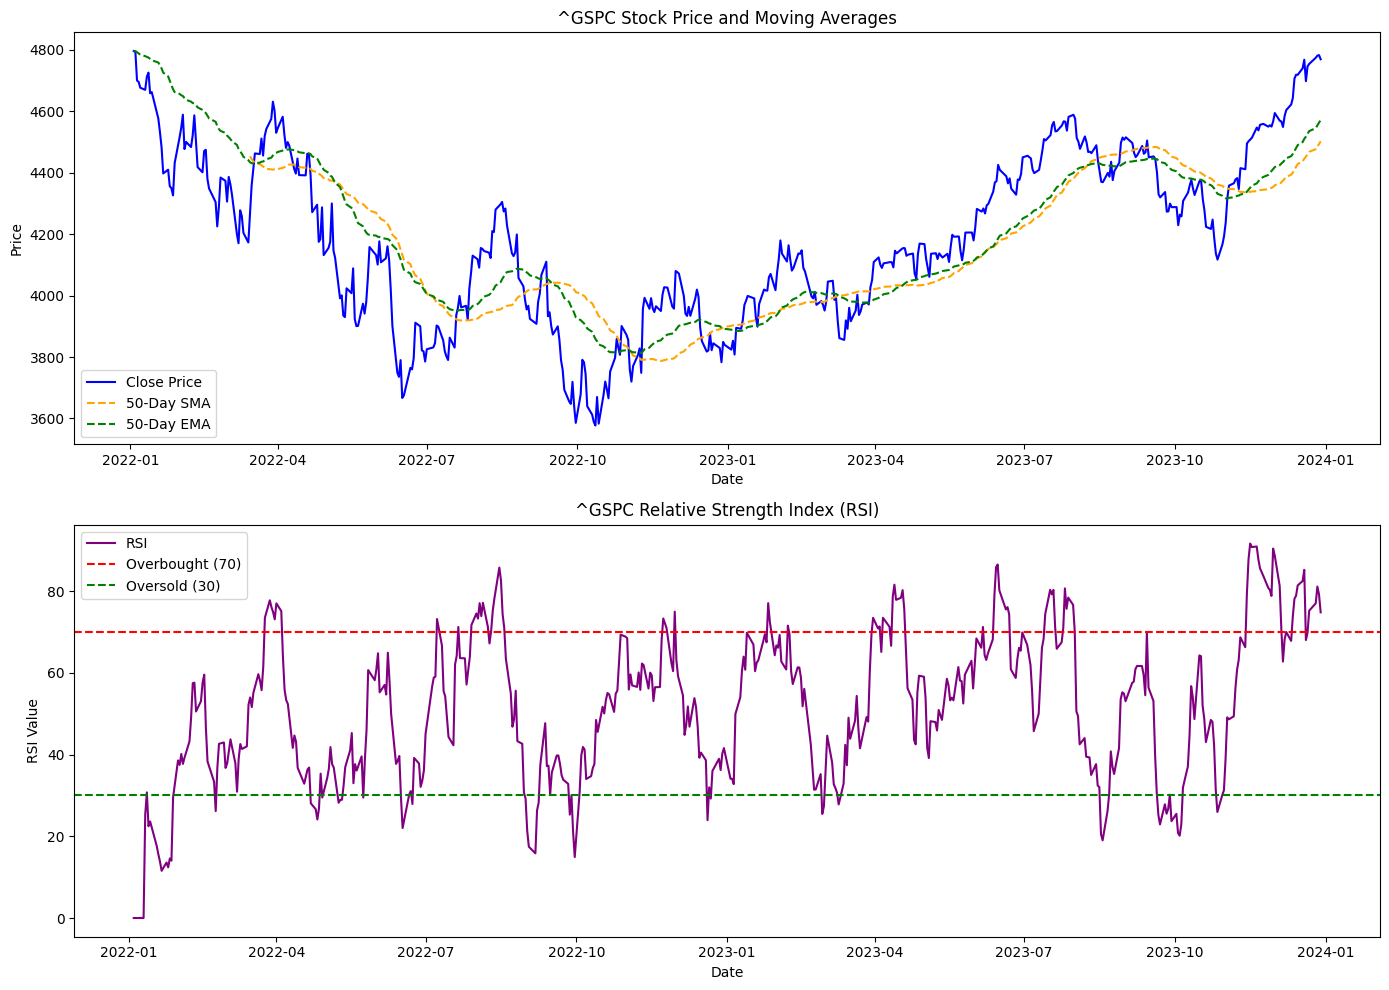

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate Moving Averages (SMA/EMA)
def calculate_moving_averages(data, sma_window=50, ema_window=50):
    data['SMA'] = data['Close'].rolling(window=sma_window).mean()
    data['EMA'] = data['Close'].ewm(span=ema_window, adjust=False).mean()
    return data

# Function to fetch stock data from Yahoo Finance
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Main analysis function
def analyze_stock(ticker):
    # Fetch stock data
    data = fetch_data(ticker, '2022-01-01', '2024-01-01')

    # Calculate RSI and moving averages
    data['RSI'] = calculate_rsi(data)
    data = calculate_moving_averages(data)

    # Plotting stock data and indicators
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))

    # Plot Closing Price and Moving Averages
    ax[0].plot(data['Close'], label='Close Price', color='blue')
    ax[0].plot(data['SMA'], label='50-Day SMA', color='orange', linestyle='--')
    ax[0].plot(data['EMA'], label='50-Day EMA', color='green', linestyle='--')
    ax[0].set_title(f'{ticker} Stock Price and Moving Averages')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Price')
    ax[0].legend()

    # Plot RSI
    ax[1].plot(data['RSI'], label='RSI', color='purple')
    ax[1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    ax[1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
    ax[1].set_title(f'{ticker} Relative Strength Index (RSI)')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('RSI Value')
    ax[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example Usage for an S&P 500 Stock (e.g., Apple)
analyze_stock('^GSPC')  # Replace with other stock tickers as needed
